*** 本文根据机器学习实战第二章代码改进* **
 
*** 使用python3实现* **

In [1]:
from numpy import *
import operator

## 创建数据集进行测试

In [2]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

## 创建分类函数计算两个数据之间的距离然后返回k个最近邻表示的最多的类

In [3]:
def classify0(inX,dataSet,labels,k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDisIndicies = sqDistances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDisIndicies[i]]
        classCount [voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse = True)
    return sortedClassCount[0][0]

## 将文件转换成矩阵，并且返回数据和类型

In [4]:
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

## 测试createDataSet函数

In [5]:
group,labels = createDataSet()

In [6]:
group

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

In [7]:
labels

['A', 'A', 'B', 'B']

## 测试分类函数

In [8]:
classify0([0,0],group , labels,3)

'B'

## 测试文件转矩阵函数

In [9]:
datingDateMat,datingLabels = file2matrix('datingTestSet2.txt')

In [10]:
datingDateMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [11]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 画出约会数据的散点图
三个特征：

1、每年获得的飞行常客里程数

2、玩视频游戏所消耗时间百分比

3、每周消费的冰激凌公升数

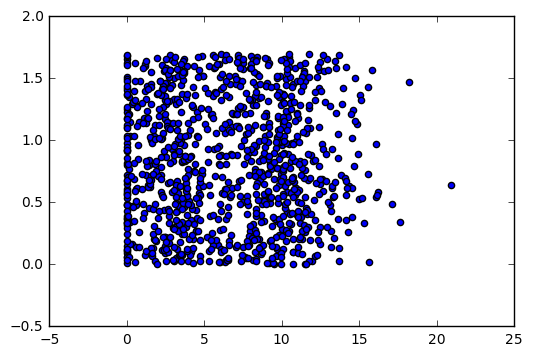

In [12]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,1],datingDateMat[:,2])
plt.show()

## 画出约会数据散点图，并根据喜欢程度进行区分
选择特征：2、3

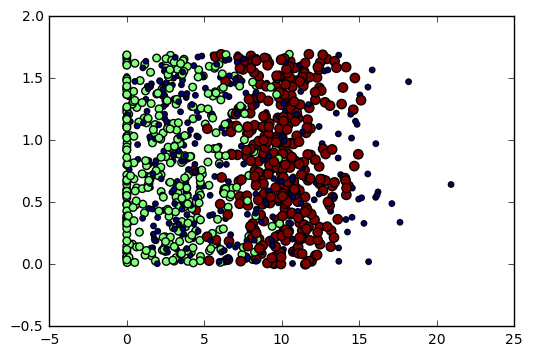

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,1],datingDateMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

## 重新选择特征后矩阵散点图的表示形式
选择特征：1、2

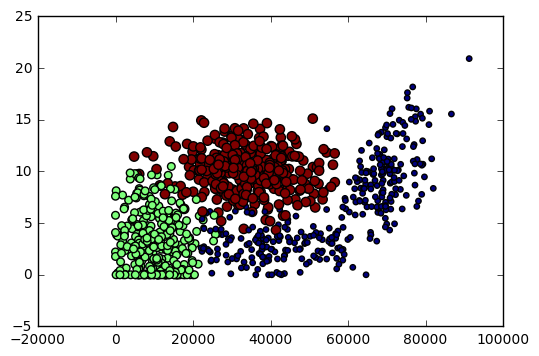

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,0],datingDateMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

## 标准化函数，把所有数据转换为-1到1之间

In [15]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [16]:
normMat,ranges,minVals = autoNorm(datingDateMat)

In [17]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [18]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [19]:
minVals

array([ 0.      ,  0.      ,  0.001156])

## 测试约会数据

In [24]:
def datingClassTest():
    hoRatio = 0.10
    datingDateMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDateMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with : %d,the real answer is : %d"%(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print("the total error rate is : %f"% (errorCount/float(numTestVecs)))

In [25]:
datingClassTest()

the classifier came back with : 3,the real answer is : 3
the classifier came back with : 2,the real answer is : 2
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 3,the real answer is : 3
the classifier came back with : 3,the real answer is : 3
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 3,the real answer is : 3
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 2,the real answer is : 2
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with : 1,the real answer is : 1
the classifier came back with :

## 定义一个人的类别

In [29]:
def classifyPerson():
    resultList = ["not at all",'in small doses','in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequenr fliier miles earned per year"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDateMat)
    inArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print("You will probably like this person: ",resultList[classifierResult - 1])

In [31]:
classifyPerson()

percentage of time spent playing video games?10
frequenr fliier miles earned per year10000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses


In [33]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [35]:
testVector = img2vector('digits/testDigits/0_13.txt')

In [37]:
testVector[0,0:31]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

## 手写字识别测试

In [54]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with:%d,the real answer is : %d" % (classifierResult,classNumStr))
        if(classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [55]:
handwritingClassTest()

the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classifier came back with:0,the real answer is : 0
the classi